In [6]:
import pandas as pda
import numpy as npy
import matplotlib.pyplot as plt
import statsmodels.formula.api as sf

## Modelos de Regresion Lineal
### Regresion Lineal Simple

In [3]:
data = pda.read_csv("../../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [9]:
## Regresion lineal simple de ventas en funcion de tv
lm = sf.ols(formula="Sales~TV",data = data).fit()
lm

In [10]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [12]:
lm.rsquared

0.611875050850071

In [13]:
lm.rsquared_adj

0.6099148238341623

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        14:20:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sales_pred = lm.predict(pda.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

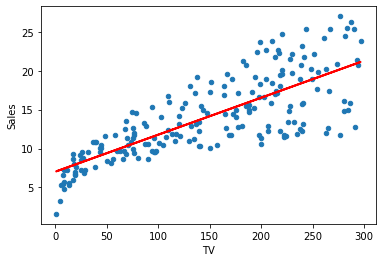

In [19]:
%matplotlib inline
data.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pda.DataFrame(data["TV"]), sales_pred ,c = "red",linewidth="2")

In [25]:
data["Sales_pred"] = 7.032594 + 0.047537*data["TV"]
data["RSE"] = (data["Sales"]-data["Sales_pred"])**2
SSD = sum(data["RSE"])
RSE = npy.sqrt(SSD/(len(data)-2))
RSE,SSD

(3.258656369238098, 2102.5305838896525)

In [26]:
sales_mean = npy.mean(data["Sales"])

In [27]:
sales_mean

14.022500000000003

In [28]:
error = RSE/sales_mean

In [29]:
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

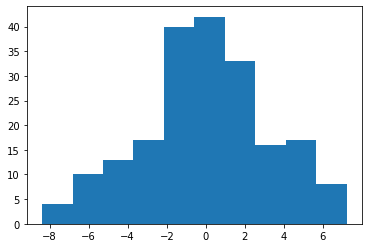

In [30]:
plt.hist(data["Sales"]-data["Sales_pred"])

In [31]:
## Regresion lineal simple de las ventas en funcion del Newspaper
lm2 = sf.ols(formula="Sales~Newspaper",data = data).fit()

In [32]:
lm2.params

Intercept    12.351407
Newspaper     0.054693
dtype: float64

In [33]:
lm2.pvalues

Intercept    4.713507e-49
Newspaper    1.148196e-03
dtype: float64

In [34]:
lm2.rsquared

0.05212044544430516

In [35]:
lm2.rsquared_adj

0.04733317496675127

In [37]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.047    
Dependent Variable: Sales            AIC:                1220.6714
Date:               2020-08-06 14:43 BIC:                1227.2680
No. Observations:   200              Log-Likelihood:     -608.34  
Df Model:           1                F-statistic:        10.89    
Df Residuals:       198              Prob (F-statistic): 0.00115  
R-squared:          0.052            Scale:              25.933   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.3514    0.6214  19.8761  0.0000  11.1260  13.5769
Newspaper       0.0547    0.0166   3.2996  0.0011   0.0220   0.0874
------------------------------------------------------------------
Omnibus:               6.231        Durbin-Watson:           1.983
Prob(Omnibus):         0.044        Jarque-Bera (JB):        5.483
Skew:                  0.330        Prob(JB):                0.064
Kurtosis:              2.527        Condition No.:           65   
==================================================================

"""

In [38]:
sales_pred = lm2.predict(pda.DataFrame(data["Newspaper"]))

In [39]:
sales_pred

0      16.136169
1      14.818066
2      16.141639
3      15.550953
4      15.545484
         ...    
195    13.106172
196    12.794421
197    12.701443
198    15.972090
199    12.827237
Length: 200, dtype: float64

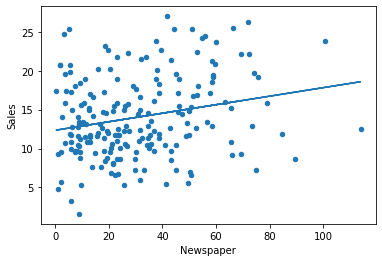

In [42]:
data.plot(kind="scatter",x="Newspaper",y="Sales")
plt.plot(pda.DataFrame(data["Newspaper"]), sales_pred)

In [45]:
data["Sales_pred"] = 12.351407-0.054693*data["Newspaper"]
data["RSE"] = (data["Sales"]-data["Sales_pred"])**2
SSD = sum(data["RSE"])
RSE = npy.sqrt(SSD/(len(data)-2))
s_m = npy.mean(data["Sales"])
error = RSE/s_m
SSD,RSE,s_m,error

(8498.216671098548, 6.551357585849626, 14.022500000000003, 0.46720325090744336)

(array([ 3.,  4., 28., 46., 35., 29., 24., 15.,  9.,  7.]),
 array([-10.2755779 ,  -7.47046507,  -4.66535224,  -1.86023941,
          0.94487342,   3.74998625,   6.55509908,   9.36021191,
         12.16532474,  14.97043757,  17.7755504 ]),
 <a list of 10 Patch objects>)

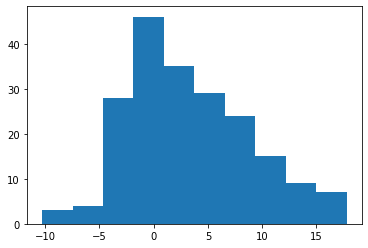

In [46]:
plt.hist(data["Sales"]-data["Sales_pred"])

In [47]:
## Regresion Lineal simple de ventas em funcion de la radio
lm3 = sf.ols(formula="Sales~Radio",data=data).fit()

In [48]:
lm3.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [49]:
lm3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.329    
Dependent Variable: Sales            AIC:                1150.6738
Date:               2020-08-06 14:55 BIC:                1157.2704
No. Observations:   200              Log-Likelihood:     -573.34  
Df Model:           1                F-statistic:        98.42    
Df Residuals:       198              Prob (F-statistic): 4.35e-19 
R-squared:          0.332            Scale:              18.275   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025    0.975]
--------------------------------------------------------------------
Intercept    9.3116     0.5629   16.5422   0.0000   8.2016   10.4217
Radio        0.2025     0.0204    9.9208   0.0000   0.1622    0.2427
------------------------------------------------------------------
Omnibus:               19.358       Durbin-Watson:          1.946 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       21.910
Skew:                  -0.764       Prob(JB):               0.000 
Kurtosis:              3.544        Condition No.:          51    
==================================================================

"""

In [50]:
sales_pred = lm3.predict(pda.DataFrame(data["Radio"]))
sales_pred

0      16.965979
1      17.269722
2      18.606195
3      17.674714
4      11.498593
         ...    
195    10.060872
196    10.303867
197    11.194849
198    17.816461
199    11.053102
Length: 200, dtype: float64

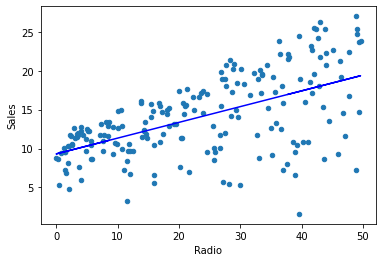

In [51]:
data.plot(kind="scatter",x="Radio",y = "Sales")
plt.plot(pda.DataFrame(data["Radio"]), sales_pred, c="blue")

In [55]:
data["Sales_pred"] = 9.311638+0.202496*data["Radio"]
data["RSE"] = (data["Sales"]-data["Sales_pred"])**2
SSD = sum(data["RSE"])
RSE = npy.sqrt(SSD/(len(data))-2)
error = RSE/s_m

In [56]:
error

0.2860783092615248

## Regresion Lineal Multiple

In [57]:
lm3 = sf.ols(formula="Sales~TV+Radio",data=data).fit()

In [58]:
lm3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                778.3941
Date:               2020-08-06 15:33 BIC:                788.2891
No. Observations:   200              Log-Likelihood:     -386.20 
Df Model:           2                F-statistic:        859.6   
Df Residuals:       197              Prob (F-statistic): 4.83e-98
R-squared:          0.897            Scale:              2.8270  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.9211     0.2945    9.9192   0.0000   2.3403   3.5019
TV           0.0458     0.0014   32.9087   0.0000   0.0430   0.0485
Radio        0.1880     0.0080   23.3824   0.0000   0.1721   0.2038
-----------------------------------------------------------------
Omnibus:             60.022       Durbin-Watson:          2.081  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       148.679
Skew:                -1.323       Prob(JB):               0.000  
Kurtosis:            6.292        Condition No.:          425    
=================================================================

"""

In [59]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [60]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [65]:
sales_pred = lm3.predict(data[["TV","Radio"]])
data["GG"] = sales_pred

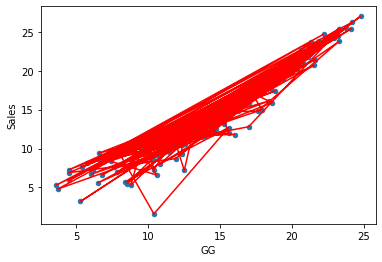

In [70]:
data.plot(kind="scatter",x="GG",y="Sales")
plt.plot(sales_pred,data["Sales"],c="red")

In [72]:
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = npy.sqrt(SSD/(len(data)-3))

In [75]:
error = RSE/s_m
error

0.11990450436855062

In [76]:
lm4 = sf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [77]:
lm4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: Sales            AIC:                1025.7782
Date:               2020-08-06 15:44 BIC:                1035.6731
No. Observations:   200              Log-Likelihood:     -509.89  
Df Model:           2                F-statistic:        179.6    
Df Residuals:       197              Prob (F-statistic): 3.95e-45 
R-squared:          0.646            Scale:              9.7389   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     5.7749     0.5253   10.9928   0.0000   4.7389   6.8110
TV            0.0469     0.0026   18.1727   0.0000   0.0418   0.0520
Newspaper     0.0442     0.0102    4.3463   0.0000   0.0242   0.0643
------------------------------------------------------------------
Omnibus:              0.658         Durbin-Watson:           1.969
Prob(Omnibus):        0.720         Jarque-Bera (JB):        0.415
Skew:                 -0.093        Prob(JB):                0.813
Kurtosis:             3.122         Condition No.:           410  
==================================================================

"""

In [78]:
lm4.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [79]:
sales_pred = lm4.predict(data[["TV","Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [80]:
SSD = sum((data["Sales"]- sales_pred)**2)
RSE = npy.sqrt(SSD/(len(data)-3))
RSE,SSD

(3.120719860252885, 1918.561811896827)

In [81]:
error = RSE/s_m
error

0.22255089037282116

In [83]:
lm5 = sf.ols(formula="Sales~TV+Newspaper+Radio",data = data).fit()

In [85]:
lm5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2020-08-06 15:50 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================

"""

In [87]:
sales_pred = lm5.predict(data[["TV","Newspaper","Radio"]])

In [91]:
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = npy.sqrt(SSD/(len(data)-4))

In [92]:
error = RSE/s_m
error

0.12020041885646236

## Multicolinealidad 
### Factor inflacion de la varianza
* VIF = 1: Las variables no estan correlacionadas
* VIF < 5: Las variables tienen una correlacion moderada y se puede quedar en el modelo
* VIF > 5: Las variables estan altamente correlacionadas y deben desaparecer del modelo 

In [95]:
lm_n = sf.ols(formula="Newspaper~TV+Radio",data = data).fit()
r_squared = lm_n.rsquared
VIF = 1/(1-r_squared)
VIF

1.145187378723929

In [96]:
lm_tv = sf.ols(formula="TV~Newspaper+Radio",data = data).fit()
r_squared = lm_tv.rsquared
VIF = 1/(1-r_squared)
VIF

1.0046107849396502

In [98]:
lm_r = sf.ols(formula="Radio~Newspaper+TV",data = data).fit()
r_squared = lm_r.rsquared
VIF = 1/(1-r_squared)
VIF

1.1449519171055353

## Validacion del Modelo

In [194]:
a = npy.random.randn(len(data))

In [195]:
c = a<.8

In [196]:
training = data[c]

In [197]:
test = data[~c]

In [198]:
len(training),len(test)

(162, 38)

In [199]:
lm = sf.ols(formula="Sales~TV+Radio",data = training).fit()

In [200]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.905   
Dependent Variable: Sales            AIC:                600.5303
Date:               2020-08-06 17:27 BIC:                609.7931
No. Observations:   162              Log-Likelihood:     -297.27 
Df Model:           2                F-statistic:        767.8   
Df Residuals:       159              Prob (F-statistic): 1.99e-82
R-squared:          0.906            Scale:              2.3414  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    3.1023     0.3108    9.9829   0.0000   2.4885   3.7161
TV           0.0437     0.0015   29.8462   0.0000   0.0408   0.0465
Radio        0.1960     0.0081   24.1676   0.0000   0.1800   0.2120
-----------------------------------------------------------------
Omnibus:              12.854       Durbin-Watson:          1.893 
Prob(Omnibus):        0.002        Jarque-Bera (JB):       14.107
Skew:                 -0.722       Prob(JB):               0.001 
Kurtosis:             3.050        Condition No.:          455   
=================================================================

"""

In [201]:
sales_pred = lm.predict(test)
sales_pred

5      13.067383
7      12.191422
8       3.889360
12     11.021500
13      8.848266
21     14.465358
22      6.795219
24      8.291751
26     15.083737
34      7.554375
42     21.348705
50     12.431946
53     20.129494
54     20.215429
55     21.468307
66      9.299440
67     12.025512
69     21.171605
71     10.698528
77     13.949081
78      9.198978
82     10.368589
89     17.265142
101    23.156692
118    15.822634
121     8.176586
130    10.895184
138    10.056280
149    10.110889
150    18.080520
157     9.896433
158    10.846124
163    17.453138
170     7.558793
183    24.085863
189     6.290445
192     4.656818
194    16.615497
dtype: float64

In [202]:
SSD = sum((test["Sales"]-sales_pred)**2)
SSD

194.15471500308897

In [203]:
RSE = npy.sqrt(SSD/(len(test)-3))
RSE

2.355265923737026

In [204]:
s_m = npy.mean(test["Sales"])
error = RSE/s_m
error

0.18541558960432356